In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import calendar
from datetime import datetime, timedelta
from scipy.spatial.distance import cdist


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


rcParams['figure.figsize'] = 16,4

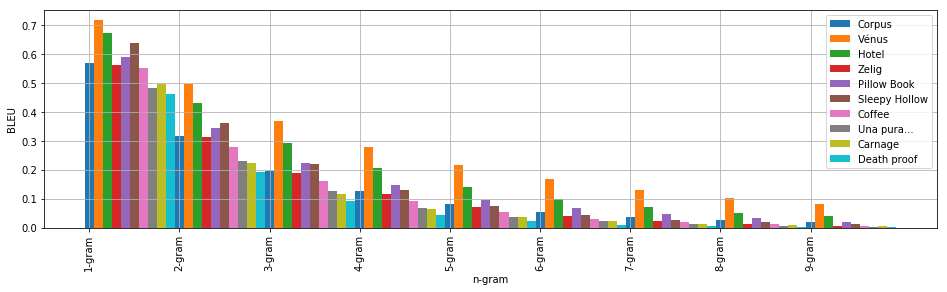

In [3]:
width = 0.1
all_ = [0.5715,   0.3163,   0.1967,   0.1251,   0.0816,   0.0542,   0.0365,   0.0251,   0.0176];
venus = [0.7171,   0.4988,   0.3683,   0.2779,   0.2151,   0.1667,   0.1293,   0.1015,   0.0819];
hotel = [0.6721,   0.4302,   0.2934,   0.2045,   0.1415,   0.0996,   0.0706,   0.0520,   0.0387];
zelig = [0.5635,   0.3142,   0.1890,   0.1152,   0.0699,   0.0415,   0.0231,  0.0119,   0.0061];
pillow = [0.5896,   0.3459,   0.2252,   0.1472,   0.0966,   0.0674,   0.0454,   0.0318,   0.0196];
hollow = [0.6393,   0.3604,   0.2211,   0.1286,   0.0733,   0.0425,   0.0270,   0.0178,   0.0107];
coffee = [0.5525,   0.2775,   0.1628,   0.0921,   0.0532,   0.0304,   0.0188,   0.0106,   0.0063];
pure = [0.4816,   0.2310,   0.1261,   0.0693,   0.0375,   0.0214,   0.0110,   0.0061,   0.0032];
carnage = [0.4967,   0.2245,   0.1173,   0.0633,   0.0358,   0.0213,   0.0135,   0.0088,   0.0059];
proof = [0.4615,   0.1931,   0.0932,   0.0444,   0.0215,   0.0094,   0.0042,   0.0020,   0.0011];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('BLEU')
plt.grid()
plt.show()

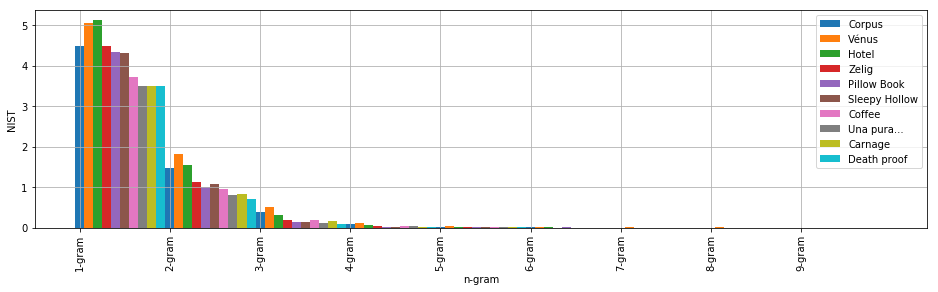

In [4]:

width = 0.1
all_ = [4.4935,   1.4625,   0.3810,   0.0757,   0.0145,   0.0026,   0.0008,   0.0002,   0.0001];
venus = [5.0541,   1.8105,   0.5076,   0.1145,   0.0302,   0.0069,   0.0025,   0.0016,   0.0008];
hotel = [5.1142,   1.5485,   0.3012,   0.0605,   0.0126,   0.0022,   0.0009,   0.0000,   0.0000];
zelig = [4.4876,   1.1370,   0.1804,   0.0270,   0.0035,   0.0005,   0.0003,   0.0000,   0.0000];
pillow = [4.3303,   0.9893,   0.1284,   0.0162,   0.0052,   0.0029,   0.0007,   0.0000,   0.0000];
hollow = [4.2992,   1.0752,   0.1460,   0.0144,   0.0017,   0.0003,   0.0000,   0.0000,   0.0000];
coffee = [3.7210,   0.9562,   0.1979,   0.0384,   0.0057,   0.0012,   0.0004,   0.0000,   0.0000];
pure = [3.5009,   0.7920,   0.1166,   0.0260,   0.0040,   0.0008,   0.0002,   0.0002,   0.0002];
carnage = [3.4984,   0.8245,   0.1566,   0.0225,   0.0037,   0.0006,   0.0002,   0.0000,   0.0000];
proof = [3.4876,   0.6951,   0.0953,   0.0099,   0.0019,   0.0001,   0.0000,   0.0000,   0.0000];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('NIST')
plt.grid()
plt.show()


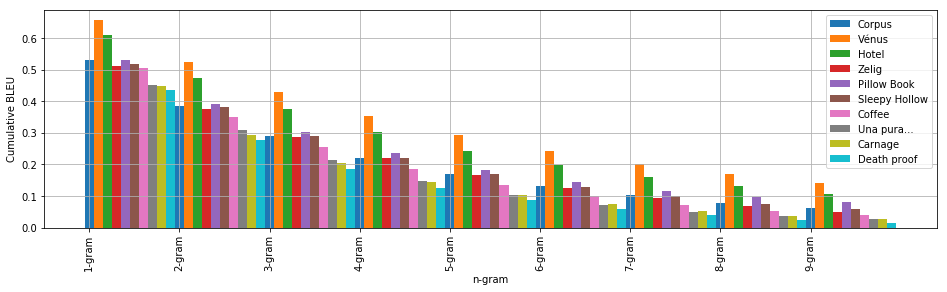

In [27]:

width = 0.1
all_ = [0.5683,   0.4228,   0.3270,   0.2569,   0.2040,   0.1634,   0.1318,   0.1071,   0.0876];
venus = [0.7095,   0.5917,   0.5034,   0.4328,   0.3755,   0.3274,   0.2863,   0.2511,   0.2215];
hotel = [0.6531,   0.5225,   0.4270,   0.3527,   0.2921,   0.2430,   0.2028,   0.1705,   0.1441];
zelig = [0.5635,   0.4207,   0.3222,   0.2492,   0.1932,   0.1495,   0.1145,   0.0862,   0.0643];
pillow = [0.5842,   0.4475,   0.3549,   0.2841,   0.2286,   0.1862,   0.1520,   0.1249,   0.1015];
hollow = [0.5409,   0.4061,   0.3137,   0.2407,   0.1835,   0.1399,   0.1080,   0.0845,   0.0659];
coffee = [0.5340,   0.3784,   0.2824,   0.2116,   0.1595,   0.1203,   0.0918,   0.0698,   0.0533];
pure = [0.4816,   0.3335,   0.2412,   0.1766,   0.1295,   0.0959,   0.0704,   0.0518,   0.0381];
carnage = [0.4726,   0.3177,   0.2241,   0.1614,   0.1182,   0.0881,   0.0669,   0.0516,   0.0403];
proof = [0.4615,   0.2985,   0.2025,   0.1386,   0.0954,   0.0649,   0.0438,   0.0298,   0.0207];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('Cumulative BLEU')
plt.grid()
plt.show()


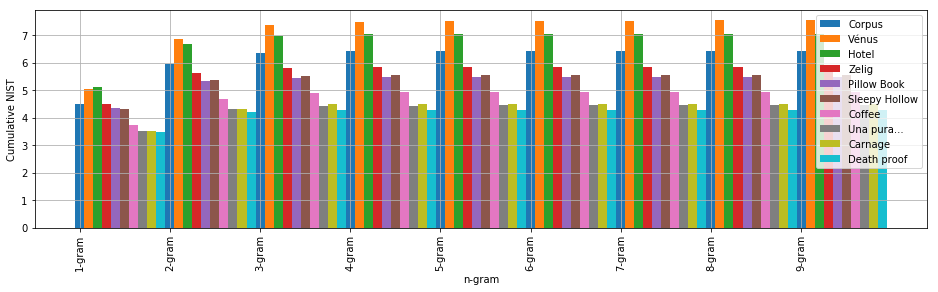

In [5]:

width = 0.1
all_ = [4.4935,   5.9559,   6.3369,   6.4126,   6.4271,   6.4297,   6.4305,   6.4307,   6.4308];
venus = [5.0541,   6.8646,   7.3722,   7.4867,   7.5169,   7.5238,   7.5263,   7.5278,   7.5287];
hotel = [5.1142,   6.6627,   6.9639,   7.0244,   7.0371,   7.0393,   7.0402,   7.0402,   7.0402];
zelig = [4.4876,   5.6246,   5.8050,   5.8320,   5.8355,   5.8360,   5.8363,   5.8363,   5.8363];
pillow = [4.3303,   5.3195,   5.4479,   5.4641,   5.4693,   5.4723,   5.4729,   5.4729,   5.4729];
hollow = [4.2992,   5.3744,   5.5204,   5.5349,   5.5366,   5.5369,   5.5369,   5.5369,   5.5369];
coffee = [3.7210,   4.6772,   4.8751,   4.9135,   4.9192,   4.9204,   4.9208,   4.9208,   4.9208];
pure = [3.5009,   4.2929,   4.4095,   4.4355,   4.4395,   4.4403,   4.4404,   4.4406,   4.4409];
carnage = [3.4984,   4.3229,   4.4795,   4.5020,   4.5057,   4.5063,   4.5065,   4.5065,   4.5065];
proof = [3.4876,   4.1827,   4.2780,   4.2878,   4.2897,   4.2898,   4.2898,   4.2898,  4.2898];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('Cumulative NIST')
plt.grid()
plt.show()
